In [35]:
import pandas as pd
import seaborn as sns
import matplotlib as mp
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import numpy as np

# Background:

We are one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. During the COVID-19 pandemic, we are facing several different challenges and everyday we are trying to address these challenges.

We thrive on making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.

Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.

We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.

# Data Description:

### Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
### X1 = my order was delivered on time
### X2 = contents of my order was as I expected
### X3 = I ordered everything I wanted to order
### X4 = I paid a good price for my order
### X5 = I am satisfied with my courier
### X6 = the app makes ordering easy for me

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

In [36]:
#!pip install pyswarms
# install thunder svm
# !wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
# !ls  # Check if required cuda 9.0 amd64-deb file is downloaded
# !dpkg -i cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
# !ls /var/cuda-repo-9-0-local | grep .pub
# !apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub
# !apt-get update
# !sudo apt-get install cuda-9.0
# !pip install thundersvm
# from thundersvm import SVC

In [37]:
#!pip install geneticalgorithm

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
data = pd.read_csv('drive/MyDrive/Colab Notebooks/apziva/ACME-HappinessSurvey2020.csv')
data
data_cleaned= pd.read_csv('drive/MyDrive/Colab Notebooks/apziva/ACME-HappinessSurvey2020_cleaned.csv')
data_cleaned

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
...,...,...,...,...,...,...,...
102,1,5,2,3,4,4,3
103,1,5,2,3,4,2,5
104,1,5,3,3,4,4,5
105,0,4,3,3,4,4,5


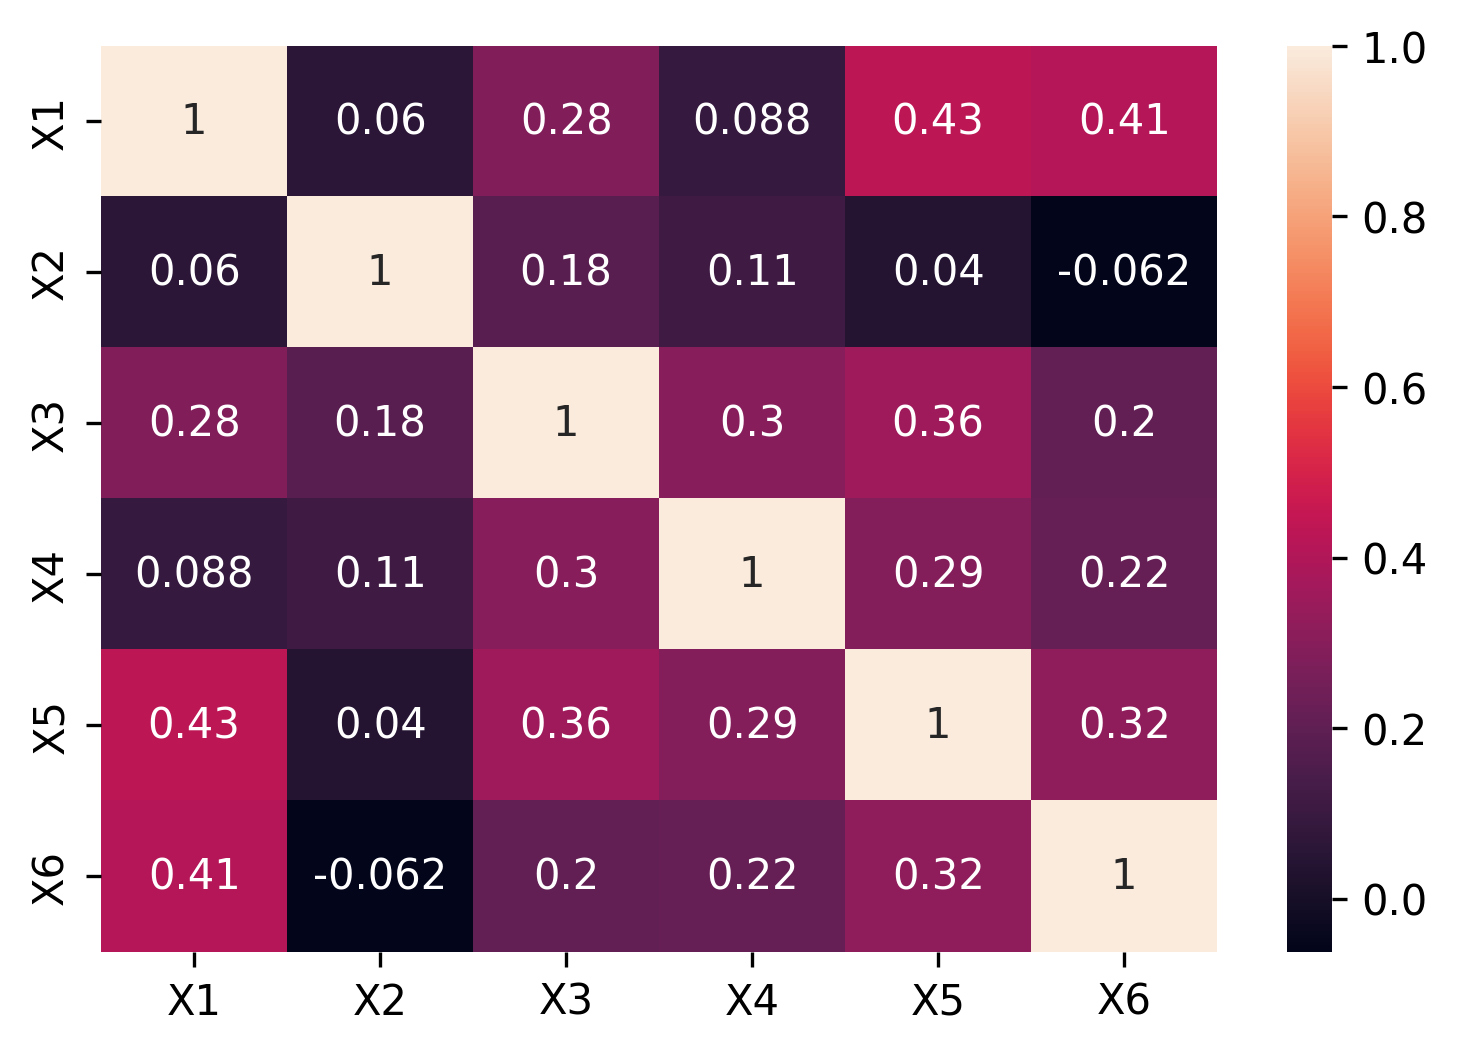

In [40]:
#@title
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
import matplotlib.pyplot as plt
import seaborn as sns
corr_data = data.iloc[:,1:]
corr = corr_data.corr()
sns.heatmap(corr, annot=True)
# check the correlation plots

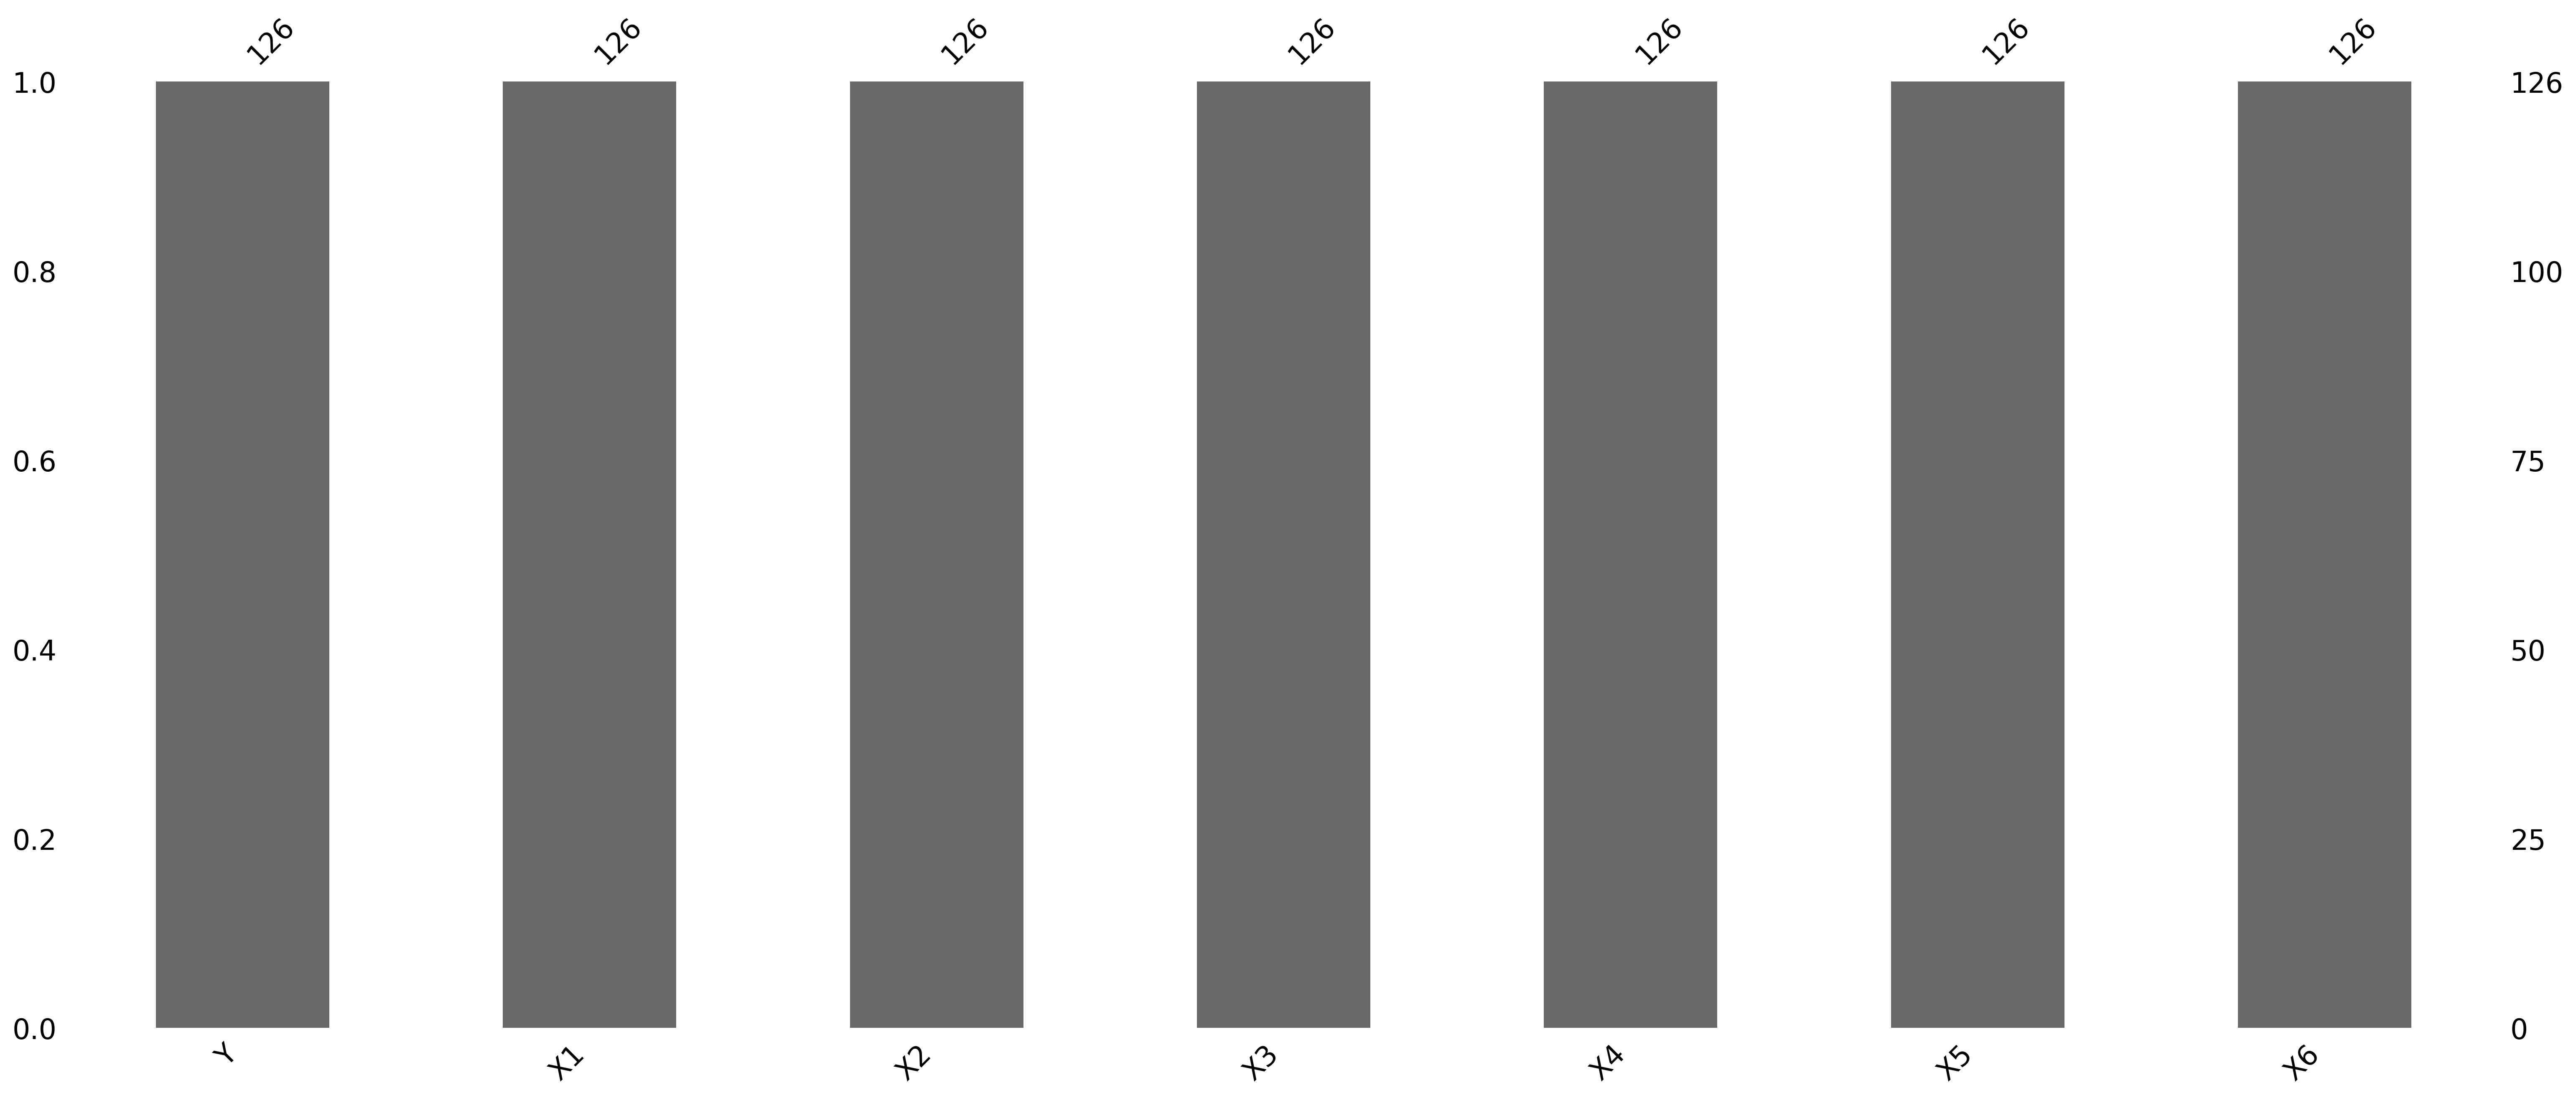

In [41]:
import missingno as msno
msno.bar(data)
# check if there are missing datas


In [42]:
y = data.Y.values
X = data.iloc[:,1:].values


In [43]:
from sklearn.ensemble import RandomForestClassifier as rdf
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest

model = rdf(n_estimators=100,max_depth=5)

np.mean(cross_val_score(estimator= model, X= X, y=y,scoring = 'accuracy',cv = 10))



0.5410256410256411

# Using a cobination of ANNOVA feature selection and RandomForest Classifier
# Best results: keeping only 3 features, achieving Accuracy of 68%

In [6]:
from sklearn.ensemble import RandomForestClassifier as rdf
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest,chi2


In [7]:
from pandas.core.common import random_state
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier as rbf
from sklearn.pipeline import Pipeline

y = data_cleaned.Y.values
X = data_cleaned.iloc[:,1:].values

rbf = rbf( criterion = 'gini',random_state = 123,class_weight= 'balanced')
anova_filter = SelectKBest(f_classif)
#n_range = np.linspace(10,20,10).astype('int').tolist()
n_range = [10,50,100,150,200,250,300,500,1000]
depth_range = [5,10,15,20,25,30,35]

k_range = [1,2,3,4,5,6]

pipeline = Pipeline(steps = [('anova',anova_filter), ('estimator', rbf)])
parameters = [
    {'anova__k': k_range,'estimator__n_estimators': n_range, 'estimator__max_depth': depth_range}]
   

clf = GridSearchCV(pipeline, parameters, scoring='accuracy', cv=5)
clf.fit(X = X, y=y) 

anova_results = pd.DataFrame(clf.cv_results_)[['param_estimator__n_estimators','param_estimator__max_depth','param_anova__k','mean_test_score','rank_test_score']]
anova_results.sort_values('mean_test_score', ascending=False)

,param_estimator__n_estimators,param_estimator__max_depth,param_anova__k,mean_test_score,rank_test_score
146,100,15,3,0.644589,1
164,100,25,3,0.644589,1
155,100,20,3,0.644589,1
173,100,30,3,0.644589,1
137,100,10,3,0.644589,1
...,...,...,...,...,...
370,50,35,6,0.448052,373
343,50,20,6,0.448052,373
361,50,30,6,0.448052,373
334,50,15,6,0.448052,373


In [ ]:
from pandas.core.common import random_state
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier as rbf
from sklearn.pipeline import Pipeline

rbf = rbf( criterion = 'gini',random_state = 123,class_weight= 'balanced')
anova_filter = SelectKBest(f_classif)
#n_range = np.linspace(10,20,10).astype('int').tolist()
n_range = [10,50,100,150,200,250,300,500,1000]
depth_range = [5,10,15,20,25,30,35]

k_range = [1,2,3,4,5,6]

pipeline = Pipeline(steps = [('anova',anova_filter), ('estimator', rbf)])
parameters = [
    {'anova__k': k_range,'estimator__n_estimators': n_range, 'estimator__max_depth': depth_range}]
   

clf = GridSearchCV(pipeline, parameters, scoring='accuracy', cv=5)
clf.fit(X = X, y=y) 

anova_results = pd.DataFrame(clf.cv_results_)[['param_estimator__n_estimators','param_estimator__max_depth','param_anova__k','mean_test_score','rank_test_score']]
anova_results.sort_values('mean_test_score', ascending=False)

In [10]:
from pandas.core.common import random_state
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier as rbf
from sklearn.pipeline import Pipeline

rbf = rbf( criterion = 'gini',random_state = 123,class_weight= 'balanced',max_features=None)
anova_filter = SelectKBest(chi2)
#n_range = np.linspace(10,20,10).astype('int').tolist()
n_range = [50,100,150,200,250,300,500,1000]
depth_range = [5,10,15,20,25,30,35]

k_range = [1,2,3,4,5,6]

pipeline = Pipeline(steps = [('anova',anova_filter), ('estimator', rbf)])
parameters = [
    {'anova__k': k_range,'estimator__n_estimators': n_range, 'estimator__max_depth': depth_range}]
   

clf = GridSearchCV(pipeline, parameters, scoring='accuracy', cv=5)
clf.fit(X = X, y=y) 

anova_results = pd.DataFrame(clf.cv_results_)[['param_estimator__n_estimators','param_estimator__max_depth','param_anova__k','mean_test_score','rank_test_score']]
anova_results.sort_values('mean_test_score', ascending=False)

,param_estimator__n_estimators,param_estimator__max_depth,param_anova__k,mean_test_score,rank_test_score
124,250,10,3,0.682462,1
131,200,15,3,0.682462,1
143,1000,20,3,0.682462,1
141,300,20,3,0.682462,1
140,250,20,3,0.682462,1
...,...,...,...,...,...
26,150,20,1,0.499692,288
24,50,20,1,0.499692,288
22,500,15,1,0.499692,288
21,300,15,1,0.499692,288


In [11]:
from pandas.core.common import random_state
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier as rbf
from sklearn.pipeline import Pipeline

rbf = rbf( criterion = 'entropy',random_state = 123,class_weight= 'balanced',max_features=None)
anova_filter = SelectKBest(chi2)
#n_range = np.linspace(10,20,10).astype('int').tolist()
n_range = [50,100,150,200,250,300,500,1000]
depth_range = [5,10,15,20,25,30,35]

k_range = [1,2,3,4,5,6]

pipeline = Pipeline(steps = [('anova',anova_filter), ('estimator', rbf)])
parameters = [
    {'anova__k': k_range,'estimator__n_estimators': n_range, 'estimator__max_depth': depth_range}]
   

clf = GridSearchCV(pipeline, parameters, scoring='accuracy', cv=5)
clf.fit(X = X, y=y) 

anova_results = pd.DataFrame(clf.cv_results_)[['param_estimator__n_estimators','param_estimator__max_depth','param_anova__k','mean_test_score','rank_test_score']]
anova_results.sort_values('mean_test_score', ascending=False)

,param_estimator__n_estimators,param_estimator__max_depth,param_anova__k,mean_test_score,rank_test_score
130,150,15,3,0.682462,1
132,250,15,3,0.682462,1
142,500,20,3,0.682462,1
141,300,20,3,0.682462,1
140,250,20,3,0.682462,1
...,...,...,...,...,...
30,500,20,1,0.499692,288
31,1000,20,1,0.499692,288
32,50,25,1,0.499692,288
34,150,25,1,0.499692,288


In [8]:
from pandas.core.common import random_state
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier as rbf
from sklearn.pipeline import Pipeline

y = data_cleaned.Y.values
X = data_cleaned.iloc[:,1:].values


rbf = rbf( criterion = 'entropy',random_state = 123,class_weight= 'balanced',max_features=None)
anova_filter = SelectKBest(chi2)
#n_range = np.linspace(10,20,10).astype('int').tolist()
n_range = [50,100,150,200,250,300,500,1000]
depth_range = [5,10,15,20,25,30,35]

k_range = [1,2,3,4,5,6]

pipeline = Pipeline(steps = [('anova',anova_filter), ('estimator', rbf)])
parameters = [
    {'anova__k': k_range,'estimator__n_estimators': n_range, 'estimator__max_depth': depth_range}]
   

clf = GridSearchCV(pipeline, parameters, scoring='accuracy', cv=5)
clf.fit(X = X, y=y) 

anova_results = pd.DataFrame(clf.cv_results_)[['param_estimator__n_estimators','param_estimator__max_depth','param_anova__k','mean_test_score','rank_test_score']]
anova_results.sort_values('mean_test_score', ascending=False)

,param_estimator__n_estimators,param_estimator__max_depth,param_anova__k,mean_test_score,rank_test_score
112,50,5,3,0.625974,1
122,150,10,3,0.625541,2
147,200,25,3,0.625541,2
165,300,35,3,0.625541,2
164,250,35,3,0.625541,2
...,...,...,...,...,...
320,50,30,6,0.457143,332
296,50,15,6,0.457143,332
328,50,35,6,0.457143,332
312,50,25,6,0.457143,332


In [58]:
data

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
...,...,...,...,...,...,...,...
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5


In [59]:
# looks like 14 features was included to score the best results, but not definatively 
y = data_cleaned.Y.values
X = data_cleaned.iloc[:,1:].values

anova_filter = SelectKBest(score_func = f_classif, k =6)
anova_filter.fit(X, y =y)
anova_filter.scores_

array([8.52176027, 1.40878008, 2.93123509, 0.17926314, 4.65599652,
       3.54774263])

In [79]:
data.columns[1:]
for i in range(1,7):
    print(i)


1
2
3
4
5
6


In [80]:
# feature importance based on F-values
F_scores = pd.DataFrame(index = data.columns[1:,].tolist())
F_scores['F_scores'] = anova_filter.scores_
F_scores.sort_values('F_scores',ascending= False,inplace=True)
F_scores['rank'] = [i for i in range(1,7)]
F_scores

,F_scores,rank
X1,8.521760,1
X5,4.655997,2
X6,3.547743,3
X3,2.931235,4
X2,1.408780,5
X4,0.179263,6


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

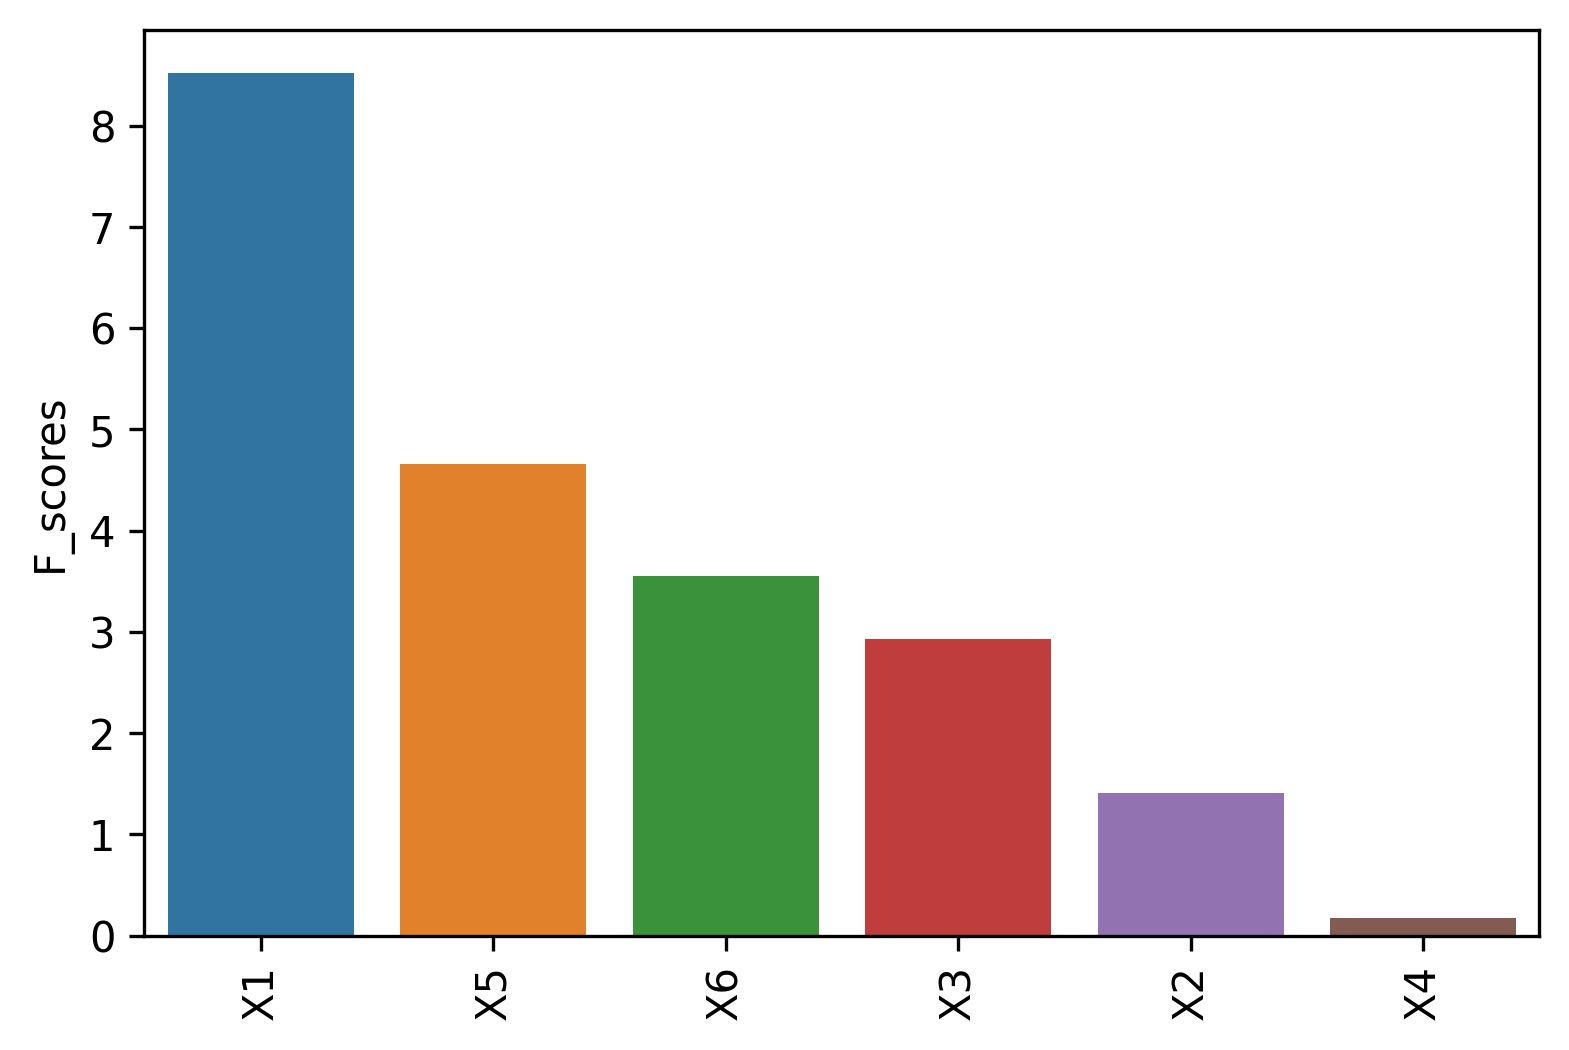

In [84]:
# Graph showing the f-scores of each feature, Keeping on the top 14 so far gave us the best performance for SVM
import seaborn as sns
sns.barplot(x=F_scores.index, y = F_scores.F_scores)
#sns.set(rc = {'figure.figsize':(10,8)})
mp.pyplot. xticks(rotation =90)

# Here we use Logistic regression
# interestingly, keeping only 1 column is able to achieve a decent 61% accuracy

In [10]:
C_range = []
import numpy as np
C_range = np.linspace(0.01, 0.1,11).round(2).tolist()

for i in np.linspace(0.2, 1.1,11).round(1).tolist():
  C_range.append(i)

for i in range(10,101,10):
  C_range.append(i)

l1_range = []
l1_range = np.linspace(0.1, 0.9,9).round(1).tolist()
l1_range

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [16]:
k_range

[1, 2, 3, 4, 5, 6]

In [15]:
# using filter methods
# the pipeline integrates univarient feature selection, standardization and logistic regression
# serching through the best number of features to keep, the highest performing input for 'penalty' and 'C' in logistic regression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(solver= 'saga',max_iter = 10000)
scaler = StandardScaler()
anova_filter = SelectKBest(f_classif)
n_range = np.linspace(5,20,20).astype('int').tolist()

pipeline = Pipeline(steps = [('anova',anova_filter),('scaler', scaler), ('estimator', logistic)])
parameters = [{'anova__k': k_range,'estimator__penalty': ['l1', 'l2'], "estimator__C": C_range},
              {'anova__k': k_range,'estimator__penalty' :['none']},
              {'anova__k': k_range,'estimator__penalty': ['elasticnet'], 'estimator__l1_ratio':l1_range, 'estimator__C': C_range}
              ]



clf = GridSearchCV(pipeline, parameters, scoring='accuracy', cv=5)
clf.fit(X = X, y=y) 

select_results = pd.DataFrame(clf.cv_results_)[['param_estimator__penalty','param_estimator__C','param_estimator__l1_ratio','param_anova__k','mean_test_score','rank_test_score']]
select_results.sort_values('mean_test_score', ascending=False)

,param_estimator__penalty,param_estimator__C,param_estimator__l1_ratio,param_anova__k,mean_test_score,rank_test_score
513,elasticnet,0.4,0.7,1,0.611077,1
510,elasticnet,0.4,0.4,1,0.611077,1
629,elasticnet,50,0.6,1,0.611077,1
628,elasticnet,50,0.5,1,0.611077,1
627,elasticnet,50,0.4,1,0.611077,1
...,...,...,...,...,...,...
754,elasticnet,0.08,0.5,2,0.508000,2114
764,elasticnet,0.09,0.6,2,0.508000,2114
774,elasticnet,0.1,0.7,2,0.508000,2114
407,elasticnet,0.02,0.9,1,0.499692,2117


In [11]:
# using filter methods
# the pipeline integrates univarient feature selection, standardization and logistic regression
# serching through the best number of features to keep, the highest performing input for 'penalty' and 'C' in logistic regression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

y = data_cleaned.Y.values
X = data_cleaned.iloc[:,1:].values



logistic = LogisticRegression(solver= 'saga',max_iter = 10000)
scaler = StandardScaler()
anova_filter = SelectKBest(f_classif)
n_range = np.linspace(5,20,20).astype('int').tolist()

pipeline = Pipeline(steps = [('anova',anova_filter),('scaler', scaler), ('estimator', logistic)])
parameters = [{'anova__k': k_range,'estimator__penalty': ['l1', 'l2'], "estimator__C": C_range},
              {'anova__k': k_range,'estimator__penalty' :['none']},
              {'anova__k': k_range,'estimator__penalty': ['elasticnet'], 'estimator__l1_ratio':l1_range, 'estimator__C': C_range}
              ]



clf = GridSearchCV(pipeline, parameters, scoring='accuracy', cv=5)
clf.fit(X = X, y=y) 

select_results = pd.DataFrame(clf.cv_results_)[['param_estimator__penalty','param_estimator__C','param_estimator__l1_ratio','param_anova__k','mean_test_score','rank_test_score']]
select_results.sort_values('mean_test_score', ascending=False)

,param_estimator__penalty,param_estimator__C,param_estimator__l1_ratio,param_anova__k,mean_test_score,rank_test_score
321,l2,0.01,NaN,6,0.607359,1
257,l2,0.01,NaN,5,0.607359,1
676,elasticnet,100,0.8,1,0.599567,3
633,elasticnet,60,0.1,1,0.599567,3
637,elasticnet,60,0.5,1,0.599567,3
...,...,...,...,...,...,...
348,l1,0.5,NaN,6,0.496104,2113
1964,elasticnet,0.5,0.9,6,0.496104,2113
350,l1,0.6,NaN,6,0.496104,2113
970,elasticnet,0.01,0.5,3,0.496104,2117


In [45]:
from pandas.core.common import random_state
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier as rbf
from sklearn.pipeline import Pipeline

rbf = rbf( criterion = 'gini',random_state = 123,class_weight= 'balanced')
anova_filter = SelectKBest(f_classif)
#n_range = np.linspace(10,20,10).astype('int').tolist()
n_range = [10,50,100,150,200,250,300,500,1000]
depth_range = [5,10,15,20,25,30,35]

k_range = [1,2,3,4,5,6]

pipeline = Pipeline(steps = [('anova',anova_filter), ('estimator', rbf)])
parameters = [
    {'anova__k': k_range,'estimator__n_estimators': n_range, 'estimator__max_depth': depth_range}]
   

clf = GridSearchCV(pipeline, parameters, scoring='accuracy', cv=5)
clf.fit(X = X, y=y) 

anova_results = pd.DataFrame(clf.cv_results_)[['param_estimator__n_estimators','param_estimator__max_depth','param_anova__k','mean_test_score','rank_test_score']]
anova_results.sort_values('mean_test_score', ascending=False)

In [29]:
kf = KFold(n_splits=10,shuffle=True,random_state=123)
def objective(h):
  output = []
  for i in range(h.shape[0]):
    a = h[i,0]
    l = h[i,1]
#    k = h[i,2]
#    x = SelectKBest(chi2,k=k).fit_transform(X,y)
    x=X
    model = rdf(n_estimators=a,max_depth=l)
    PE = []
    for idxtrain, idxtest in kf.split(x):
      xtrain = x[idxtrain]
      ytrain = y[idxtrain]
      #xtrain = scale.fit_transform(xtrain)
      xtest = x[idxtest]
      ytest = y[idxtest]
      #xtest = scale.transform(xtest)
      model.fit(xtrain,ytrain)
      PE.append(MSE(ytest,model.predict(xtest)))
    output.append(np.mean(PE))
  return output

# attempted  to use PSO(particle swarm) grid serch algorithm, not able to make it work(takes only continuous variables)

In [30]:
max = np.array([500,20,6])
min = np.array([50,5,1])
bounds = (min, max)
bounds

(array([50,  5,  1]), array([500,  20,   6]))

In [35]:
h= np.array([[10,30, 50,100,120,150,200,250,300],[3,4,5,7,9,10,13,15,17]])

In [37]:
# instantiate the optimizer
max = np.array([500,20])
min = np.array([50,5])
bounds = (min, max)
options = {'c1': 0.25, 'c2': 0.25, 'w': 0.5}
optimizer = ps.discrete.GlobalBestPSO(n_particles=20, dimensions=2, options=options, bounds=)
cost, pos = optimizer.optimize(objective, iters=100)

SyntaxError: ignored

In [ ]:
# using PSO(particle swarm grip serch algorithm to find the best parameter)

In [9]:
# Predict if a customer is happy or not based on the answers they give to questions asked.
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
scaler = StandardScaler()

In [8]:
C_range = []
import numpy as np
C_range = np.linspace(0.01, 0.1,11).round(2).tolist()

for i in np.linspace(0.2, 1.1,11).round(1).tolist():
    C_range.append(i)

C_range.append(10)
#for i in range(10,101,10):
 #   C_range.append(i)

gamma_range =[]
for i in np.linspace(0.001, 0.01,10).round(3).tolist():
    gamma_range.append(i)

for i in np.linspace(0.02, 0.1,9).round(2).tolist():
    gamma_range.append(i)

for i in np.linspace(0.1, 1,10).round(2).tolist():
    gamma_range.append(i)

#gamma_range.append('scale')
#gamma_range.append('auto')

degree_range = np.linspace(2,10,9).astype(int).tolist()

k_range = [1,2,3,4,5,6]


In [9]:
degree_range

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [20]:
#np.linspace(3,6,4).astype('int').tolist()

# Attempted to use GridserchCV & Thunder SVM, but took 18 hours and no results came out

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from thundersvm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

y = data.Y.values
X = data.iloc[:,1:].values

svc = SVC()
scaler = StandardScaler()
anova_filter = SelectKBest(f_classif)



pipeline = Pipeline(steps = [('scaler',scaler),('anova',anova_filter), ('estimator', svc)])
parameters = [
#    {'anova__k': k_range,'estimator__kernel': ['linear'], 'estimator__C': C_range},
    {'anova__k': k_range,'estimator__kernel': ['rbf'],    'estimator__C': C_range, 'estimator__gamma': gamma_range },
    {'anova__k': k_range,'estimator__kernel': ['polynomial'],   'estimator__C': C_range, 'estimator__degree': degree_range},
    {'anova__k': k_range,'estimator__kernel': ['sigmoid'],  'estimator__C': C_range,'estimator__gamma':  gamma_range}
]

clf = GridSearchCV(pipeline, parameters, scoring='accuracy', cv=5)
clf.fit(X = X, y=y) 

anova_results = pd.DataFrame(clf.cv_results_)[['param_estimator__kernel','param_estimator__C','param_estimator__gamma','param_estimator__degree','param_anova__k','mean_test_score','rank_test_score']]
anova_results.sort_values('mean_test_score', ascending=False)

In [ ]:
anova_results

# Here we try a simple neural network
# best accuracy score of 78%, but not quite interpreable in terms of feature importance

In [44]:
from keras.models import Sequential # we want t ocreate a sequence of layers
from keras.layers import Dense


from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score as acc
from sklearn.datasets import load_digits
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold
from keras import backend as K # simpler modeulized approach
from sklearn.preprocessing import OneHotEncoder, StandardScaler # we need OneHotEncoder

In [45]:
y = data.Y.values
X = data.iloc[:,1:].values
X.shape
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

In [46]:
#enc = OneHotEncoder()
#Y = enc.fit_transform(y[:, np.newaxis]).toarray()

In [48]:
model = Sequential()              # input dimention is 64 becasue the image is 8*8 pixels
model.add(Dense(100,kernel_initializer='random_normal',input_dim=6, activation='relu')) # first layer
model.add(Dense(100,kernel_initializer='random_normal', activation='relu'))               # second layer
model.add(Dense(100,kernel_initializer='random_normal', activation='relu'))  
model.add(Dense(100,kernel_initializer='random_normal', activation='relu'))            # third layer
model.add(Dense(2, activation='softplus'))   # last layer must have 10 becasue this is a 10-class classification (numbers 1-10)
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])   # sdg is stocratic gradient desent 

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
scale = StandardScaler()
kf = StratifiedKFold(n_splits=10,shuffle=True, random_state=123)

A = []
for idxtrain, idxtest in kf.split(X,y):
  Xtrain = scale.fit_transform(X[idxtrain])
  Xtest = scale.transform(X[idxtest])
  ytrain = Y[idxtrain]
  ytest = Y[idxtest]
  model.fit(Xtrain,ytrain,epochs=200, verbose=0,validation_split=0.1,batch_size=10) # epochs are a guess (too many might be too long, too little might not be enough) #validation_split: 0.1 = 10 fold, 
  score = model.evaluate(Xtest,ytest)
  A.append(score[1])
np.mean(A)

1/1 [==============================] - 0s 21ms/step - loss: 0.0643 - accuracy: 1.0000


0.7858974456787109

In [ ]:
# able to get a 78.5% accurcy score